In [2]:
import pandas as pd

In [3]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sn

Loading the Datasets using pandas

In [5]:
dataset = pd.read_csv("h1b.csv")
len(dataset)

3002458

Cleaning the dataset

In [7]:
dataset = dataset.dropna()
dataset.reset_index()
print(len(dataset))

2877765


Having a look over the imported dataset

In [8]:
dataset.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


Removing the useless column "Unnamed 0"

In [9]:
del dataset['Unnamed: 0']

In [10]:
dataset.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


Checking out the top 15 Employers

In [11]:
dataset.EMPLOYER_NAME.value_counts().head(15)

INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
CAPGEMINI AMERICA INC                               16628
GOOGLE INC.                                         16425
LARSEN & TOUBRO INFOTECH LIMITED                    14318
IGATE TECHNOLOGIES INC.                             12327
IBM CORPORATION                                     11976
Name: EMPLOYER_NAME, dtype: int64

Plotting the outputs for better understanding

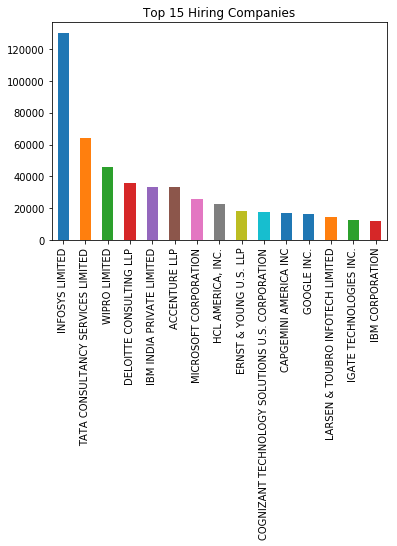

In [12]:
dataset['EMPLOYER_NAME'].value_counts().head(15).plot(kind='bar',title='Top 15 Hiring Companies')

Analysing the wages of H1B Visa Holders

In [14]:
dataset.PREVAILING_WAGE.value_counts().sort_values(ascending=False).head()

60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: PREVAILING_WAGE, dtype: int64

Claculating the mean wage

In [15]:
dataset.PREVAILING_WAGE.mean()

145166.64888402403

Determining the wages given by different employers

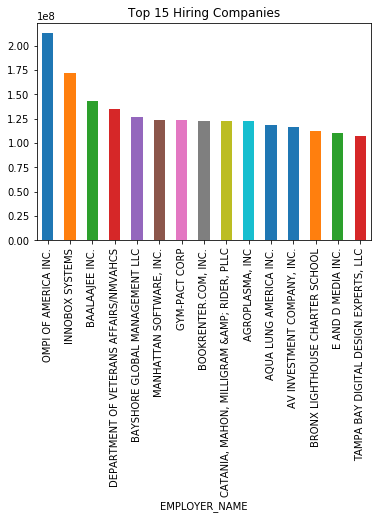

In [20]:
dataset.groupby(['EMPLOYER_NAME']).mean()['PREVAILING_WAGE'].nlargest(15).plot(kind='bar',title='Top 15 Hiring Companies')

Determining the states with maximum H1B holders

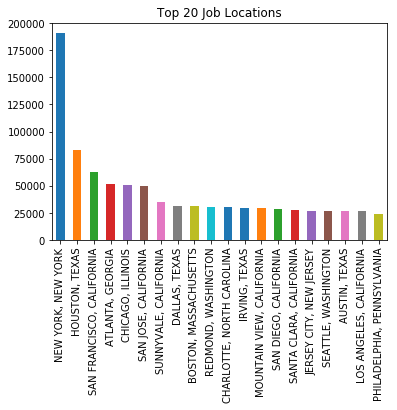

In [22]:
dataset['WORKSITE'].value_counts().head(20).plot(kind='bar',title='Top 20 Job Locations')

Analysing the types of Case-Status

In [23]:
status_freq = [0]*7
statuses = ['CERTIFIED-WITHDRAWN','CERTIFIED','DENIED','WITHDRAWN','REJECTED','INVALIDATED','PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']
for i in range(0,7):
    status_freq[i] = dataset[dataset.CASE_STATUS==statuses[i]]['CASE_STATUS'].count()
status_freq    

[195721, 2512114, 85161, 84752, 1, 1, 15]

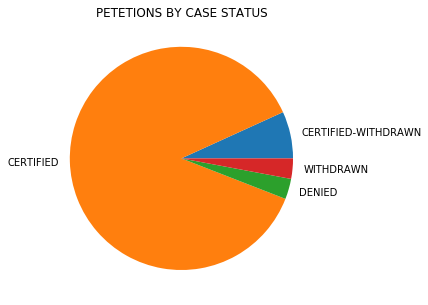

In [24]:
from matplotlib.pyplot import pie,axis,show
import matplotlib as mpl
plt.figure(figsize=(5,5))
plt.title('PETETIONS BY CASE STATUS')
axis('equal');
pie(status_freq[:4], labels = statuses[:4]);
show()

In [34]:
years = [2011.0,2012.0,2013.0,2014.0,2015.0,2016]
year_count = [0]*6
for i in range(0,6):
    year_count[i] = dataset[dataset.YEAR==years[i]]['YEAR'].count()
year_count    

[333625, 394267, 422427, 498027, 600120, 629299]

ANALYSING NUMBER OF H1B VISA ALLOTTED BY YEAR

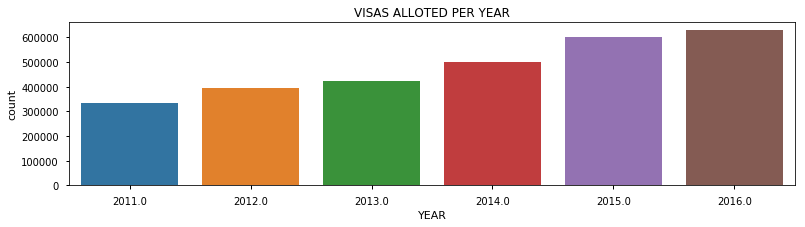

In [35]:
sn.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,3))
plt.title('VISAS ALLOTED PER YEAR')
sn.countplot(dataset['YEAR'])

It claearly shows that every year number of petetions are increasing

In [36]:
dataset.JOB_TITLE.value_counts().sort_values(ascending=False).head(25)

PROGRAMMER ANALYST             243357
SOFTWARE ENGINEER              118897
COMPUTER PROGRAMMER             68696
SYSTEMS ANALYST                 60754
SOFTWARE DEVELOPER              41875
BUSINESS ANALYST                38781
COMPUTER SYSTEMS ANALYST        34036
TECHNOLOGY LEAD - US            28307
SENIOR SOFTWARE ENGINEER        26617
TECHNOLOGY ANALYST - US         26010
ASSISTANT PROFESSOR             24436
SENIOR CONSULTANT               24120
CONSULTANT                      22643
PROJECT MANAGER                 19015
DATABASE ADMINISTRATOR          16108
PHYSICAL THERAPIST              14203
RESEARCH ASSOCIATE              13409
COMPUTER PROGRAMMER ANALYST     13116
ACCOUNTANT                      12934
DEVELOPER                       12737
ASSOCIATE                       12447
ANALYST                         11644
LEAD ENGINEER                   11012
SENIOR SOFTWARE DEVELOPER       10031
SYSTEMS ENGINEER - US           10020
Name: JOB_TITLE, dtype: int64

Analysing the Job Roles for which visas were applied

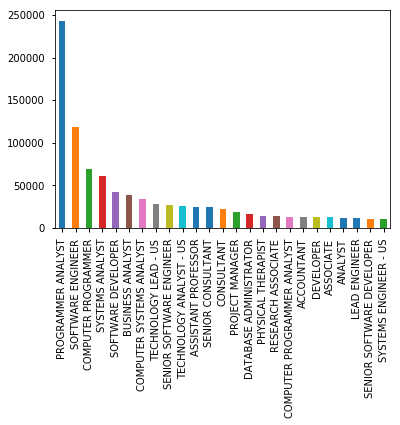

In [37]:
dataset.JOB_TITLE.value_counts().sort_values(ascending=False).head(25).plot(kind='bar')

Analysing 2017 Data

In [39]:
dataset2017 = pd.read_csv('h1b2017.csv', low_memory=False)

In [40]:
len(dataset2017)

624650

In [45]:
datase2017 = dataset2017.dropna()
len(dataset2017)

624650

In [46]:
dataset2017.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,...,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


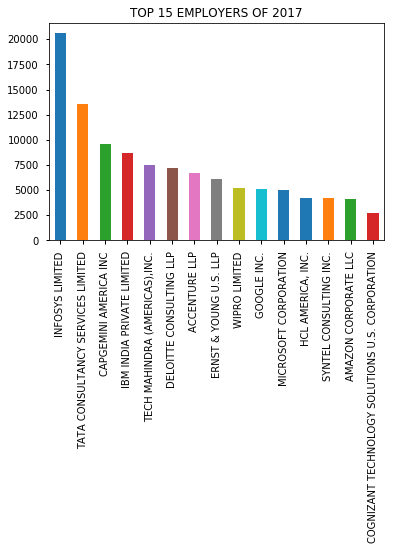

In [48]:
dataset2017['EMPLOYER_NAME'].value_counts().head(15).plot(kind='bar',title='TOP 15 EMPLOYERS OF 2017')